In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

In [2]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [3]:
# Dimensions of training data
data.shape

(4277, 13)

In [4]:
# Print first few rows of data
data.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [4]:
# drop id, timestamp and country columns
data = data.drop(columns=['id', 'timestamp','country'])

In [5]:
# Explore columns
data.columns

Index(['employment_status', 'job_title', 'job_years', 'is_manager',
       'hours_per_week', 'telecommute_days_per_week', 'education',
       'is_education_computer_related', 'certifications', 'salary'],
      dtype='object')

In [6]:
# replace NANs in hours_per_week with median value of the column  
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()

In [7]:
#Handling null values in categorical columns
data = data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4261 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employment_status              4261 non-null   object 
 1   job_title                      4261 non-null   object 
 2   job_years                      4261 non-null   float64
 3   is_manager                     4261 non-null   object 
 4   hours_per_week                 4261 non-null   float64
 5   telecommute_days_per_week      4261 non-null   float64
 6   education                      4261 non-null   object 
 7   is_education_computer_related  4261 non-null   object 
 8   certifications                 4261 non-null   object 
 9   salary                         4261 non-null   float64
dtypes: float64(4), object(6)
memory usage: 366.2+ KB


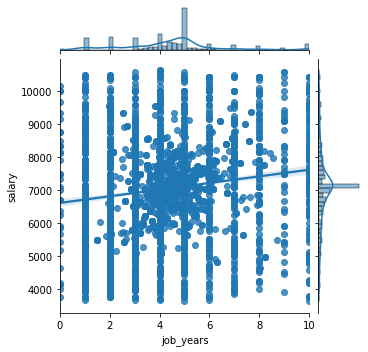

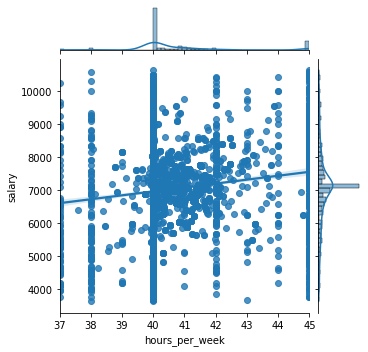

In [9]:
# joint plots for numeric variables

cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.jointplot(x=c, y="salary", data=data, kind = 'reg', height = 5)
plt.show()


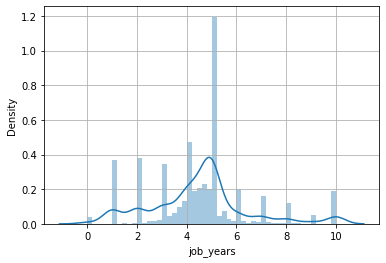

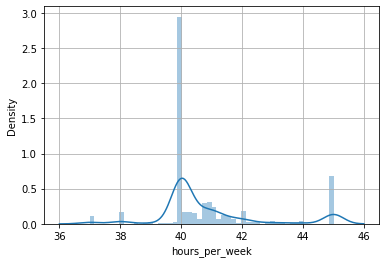

In [10]:
cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.distplot(data[c])
    plt.grid()
    plt.show()

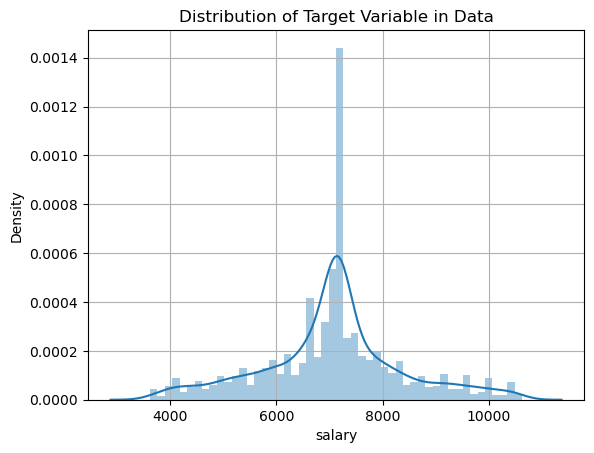

max: 10625.0
min: 3622.0


In [13]:
# distribution of target variable
sns.distplot(data['salary'])
plt.grid()
plt.title('Distribution of Target Variable in Data')
plt.show()
print('max:', np.max(data['salary']))
print('min:', np.min(data['salary']))

In [11]:
# create another copy of dataset and append encoded features to it
data_train = data.copy()
data_train.head()

,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [12]:
# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object' 
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols

['employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [13]:
#Encoding binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [14]:
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True)
final_data.shape

(4261, 25)

In [19]:
final_data.columns

Index(['job_years', 'is_manager', 'hours_per_week',
       'telecommute_days_per_week', 'certifications', 'salary',
       'employment_status_Independent or freelancer or company owner',
       'employment_status_Part time', 'job_title_Analytics consultant',
       'job_title_Architect', 'job_title_DBA', 'job_title_Data Scientist',
       'job_title_Developer', 'job_title_Engineer', 'job_title_Manager',
       'job_title_Other', 'job_title_Principal database engineer',
       'job_title_Sales', 'job_title_Sr Consultant ',
       'education_Bachelors (4 years)', 'education_Doctorate/PhD',
       'education_Masters', 'education_None (no degree completed)',
       'is_education_computer_related_Unknown',
       'is_education_computer_related_Yes'],
      dtype='object')

In [15]:
final_data

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,salary,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
0,4.783930,1,40.0,0.0,0,7187.743094,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,5.000000,0,40.0,5.0,0,10000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.000000,0,40.0,0.0,1,7000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.000000,0,40.0,2.0,0,8333.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3.000000,0,40.0,2.0,1,7137.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2.000000,1,40.0,0.0,0,4917.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4273,4.140793,1,40.0,0.0,0,7033.845701,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4274,5.000000,0,40.0,0.0,0,7166.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4275,4.000000,1,40.0,2.0,0,9583.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [17]:
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)


Training Set Dimensions: (2982, 24)
Validation Set Dimensions: (1279, 24)


In [18]:
# select numerical features
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']
num_cols


['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [19]:
# Apply standard scaling on numeric data 
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [20]:
X_train

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
3292,0.248190,1,-0.496560,-0.022626,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2076,0.410767,1,-0.276341,2.408759,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3882,-1.746517,0,-0.496560,-0.630472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1314,-0.398100,1,0.349825,-0.630472,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1792,-0.749163,0,2.326762,-0.022626,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,-0.250487,0,2.326762,-0.630472,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
2834,-1.746517,0,1.762098,-0.630472,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
505,0.248190,0,-0.496560,2.408759,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
16,-1.247840,0,-1.625889,-0.022626,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [21]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [22]:
reg.coef_

array([  204.07478548,    68.02636421,   208.5811127 ,   226.66821074,
          66.32664404,   -74.51291935,   143.32227515, -2259.91472706,
        1112.20052606,   773.352293  ,   581.84469499,   523.27142456,
         958.78082128,   686.81726325,    60.81147472,   891.06575615,
         657.79244443,  3549.18508183,   355.4750053 ,  -324.58961512,
         154.11319329,   215.84182457,  -280.36395414,  -161.82054974])

In [23]:
reg.intercept_

6210.784845377272

In [24]:
mean_absolute_error(y_train,reg.predict(X_train))

871.6783697204099

In [25]:
mean_squared_error(y_train,reg.predict(X_train))**0.5

1226.1150540066426

In [26]:
X_test[num_cols] = scaler.transform(X_test[num_cols])
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

837.2343358183513 1190.4725204477772


In [27]:
X_test.describe()

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.0,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.0,1279.0,1279.0,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,-0.037114,0.223612,-0.043153,-0.008369,0.509773,0.034402,0.001564,0.0,0.088350,0.488663,0.003909,0.261142,0.039093,0.054730,0.014855,0.0,0.0,0.0,0.530102,0.007037,0.183737,0.156372,0.157154,0.555903
std,0.976272,0.416828,0.967294,1.009260,0.500100,0.182330,0.039528,0.0,0.283915,0.500067,0.062427,0.439429,0.193892,0.227542,0.121021,0.0,0.0,0.0,0.499288,0.083622,0.387421,0.363350,0.364088,0.497059
min,-2.245194,0.000000,-2.190554,-0.630472,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.585359,0.000000,-0.496560,-0.630472,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.069081,0.000000,-0.496560,-0.630472,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.248190,0.000000,0.121507,-0.022626,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.741575,1.000000,2.326762,2.408759,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


837.0816408373471 1190.6829662913028


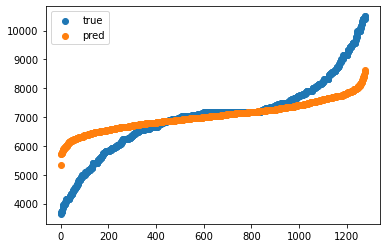

In [28]:
#Q3
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test), label='true')
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred), label = 'pred')
plt.legend()

In [56]:
ridge.coef_

array([  177.56361745,    99.0179722 ,   211.28879467,   236.147193  ,
         103.86602711,   -19.13963956,   139.69074116, -1137.12806553,
        1013.58653011,   839.47603653,   397.440238  ,   520.61425859,
         929.83683081,   760.90985183,    67.78041625,     0.        ,
         361.36713628,  1746.66466181,   367.97962346,   -52.84282985,
         208.26723757,   119.231464  ,  -187.11442652,  -161.3731875 ])

837.4107740634062 1191.3403974024684


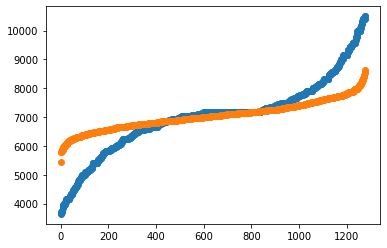

In [29]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test))
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred))

In [58]:
lasso.coef_

array([ 177.33293498,   99.31133351,  209.06204931,  235.3843425 ,
        103.81046782,   -0.        ,    0.        ,   -0.        ,
        907.73306732,  741.01602572,  107.1203366 ,  420.19603219,
        819.00056924,  652.94966868,   -0.        ,    0.        ,
          0.        ,  423.57682362,  350.8458557 ,   -0.        ,
        187.14675338,   66.91017677, -146.47162919, -151.17281073])